In [50]:
import re
import unicodedata
import pandas as pd
import nltk
import acquire
import prepare

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt', 'was', '-PRON-']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

# Clean up the text file and label the columns
df = pd.read_csv('spam.csv', encoding='latin_1')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(index=str, columns={"v1": "label", "v2": "text"})
df.head()

from wordcloud import WordCloud

In [2]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [3]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [4]:
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cu

In [5]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [6]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


In [7]:
# What are the most frequently occuring words?
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5
free,275,59,216
know,267,241,26


In [8]:
# Are there any words that uniquely identify a spam or ham message?
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])

,all,ham,spam
thats,94,94,0
i_,117,117,0
say,118,118,0
da,132,132,0
later,134,134,0
lor,160,160,0
awarded,38,0,38
18,43,0,43
guaranteed,50,0,50
tone,73,0,73


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

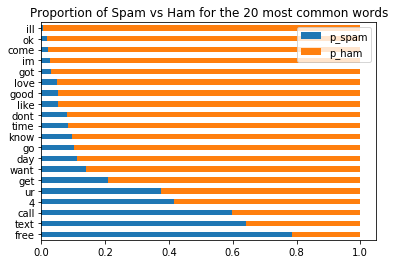

In [9]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

In [10]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,ham,spam,ratio
im,462,449,13,0.028953
good,235,223,12,0.053809
like,245,232,13,0.056032
need,182,171,11,0.064324
dont,279,257,22,0.085600
contact,70,14,56,3.997145
win,76,15,61,4.063957
cash,74,12,62,5.162365
mobile,150,15,135,8.994004
txt,163,13,150,11.529593


# Word Cloud

_An example..._

(-0.5, 399.5, 199.5, -0.5)

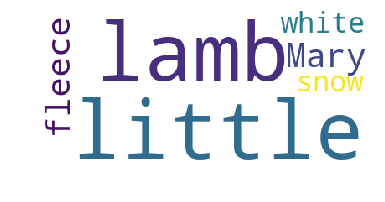

In [11]:
from wordcloud import WordCloud

sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

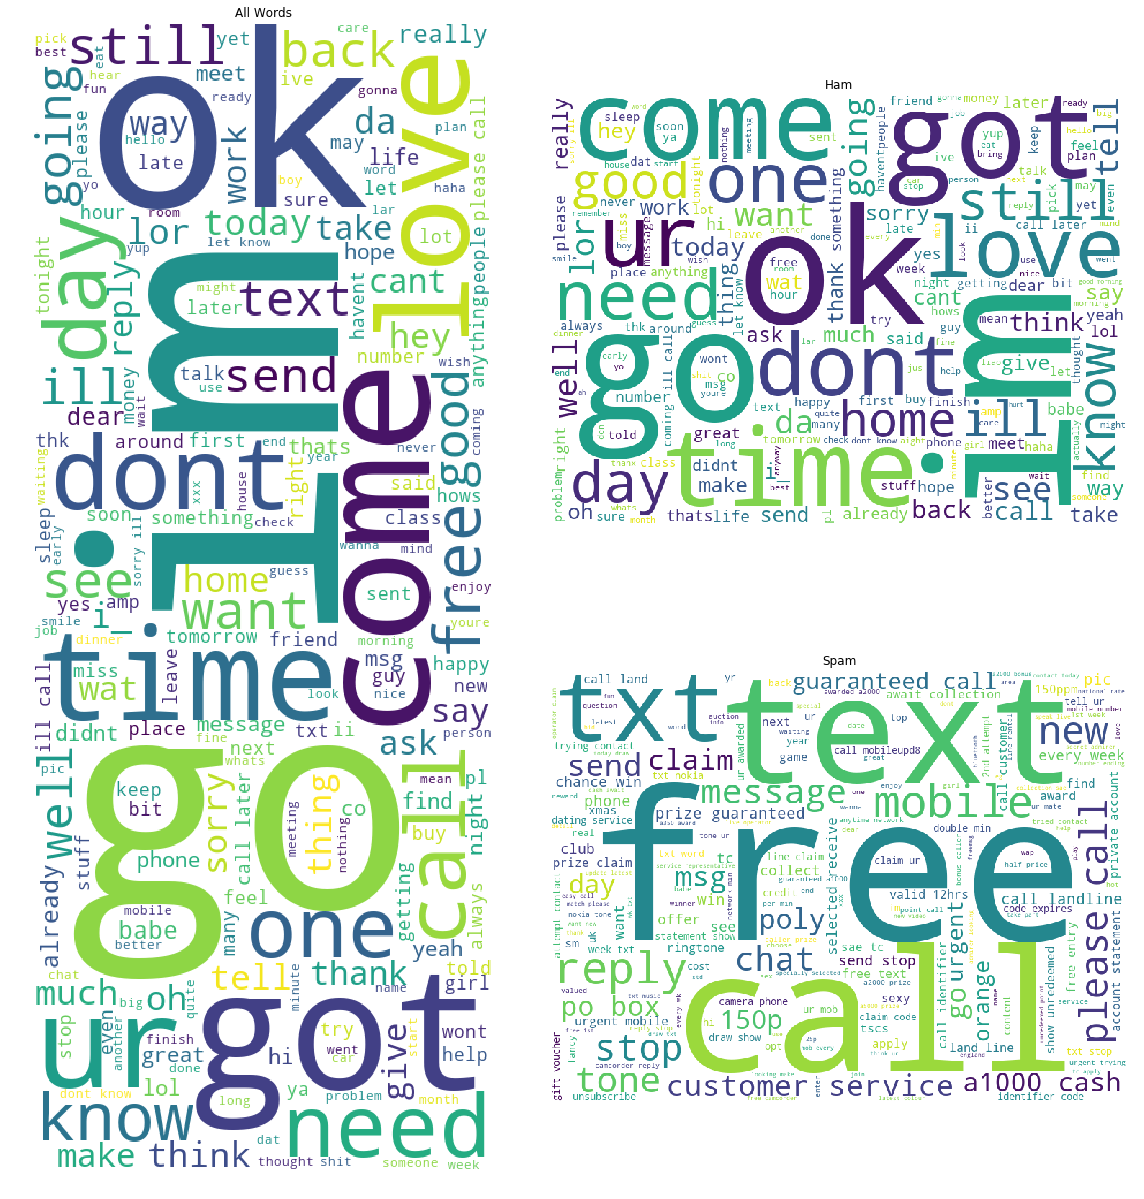

In [12]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(16, 16))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

# Bigrams

_An example..._

In [13]:
sentence = 'Mary had a little lamb'

bigrams = nltk.ngrams(sentence.split(), 2)
list(bigrams)

[('Mary', 'had'), ('had', 'a'), ('a', 'little'), ('little', 'lamb')]

## Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams? Is there any overlap in the bigrams for the spam data and the ham data?

_Both sets of words are very similar. 'call later', 'let know', 'ill call' appears in both spam and ham._

In [14]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

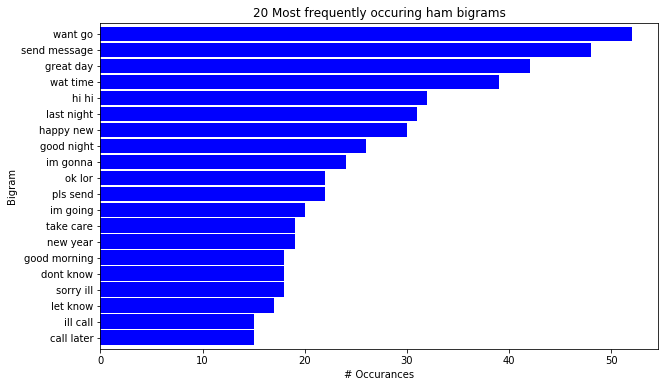

In [15]:
top_20_ham_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [16]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

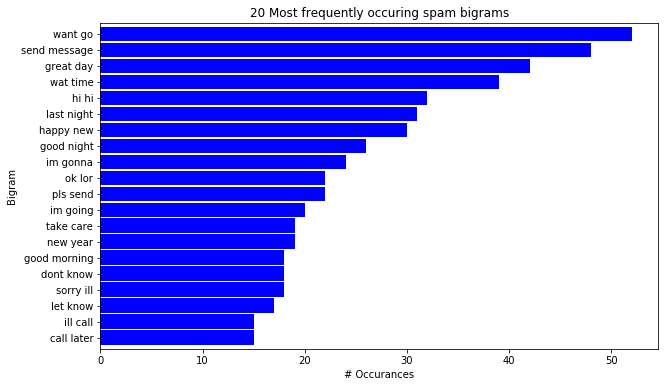

In [17]:
top_20_spam_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

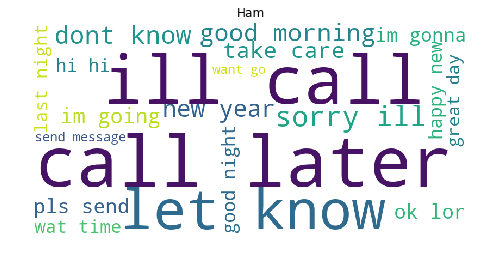

In [18]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


ham_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_data)
plt.figure(figsize=(8, 4))
plt.title('Ham', fontsize=12)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

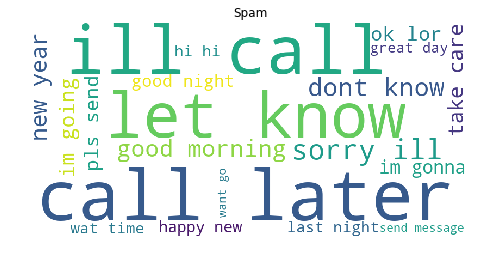

In [19]:
spam_data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_data)
plt.figure(figsize=(8, 4))
plt.title('Spam', fontsize=12)
plt.imshow(img)
plt.axis('off')

In [56]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(right, pls, send)      12
dtype: int64

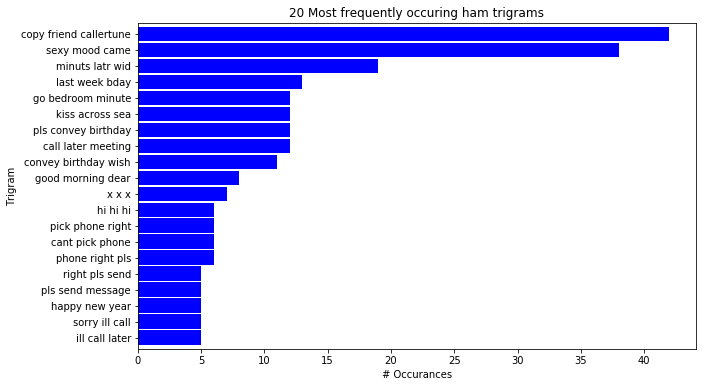

In [59]:
top_20_ham_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

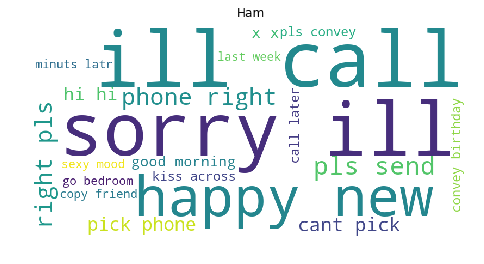

In [60]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


ham_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_data)
plt.figure(figsize=(8, 4))
plt.title('Ham', fontsize=12)
plt.imshow(img)
plt.axis('off')

In [61]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

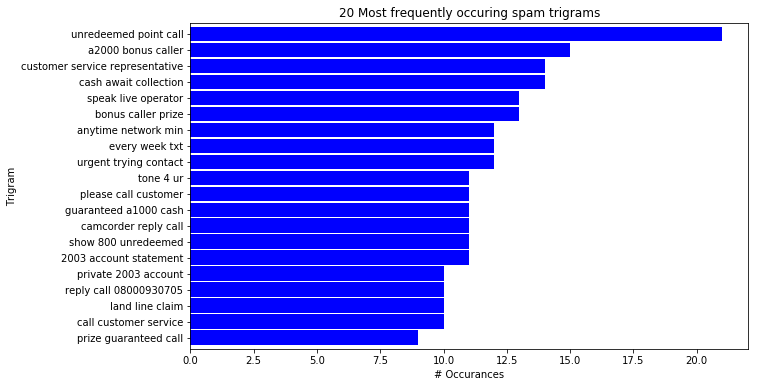

In [62]:
top_20_spam_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

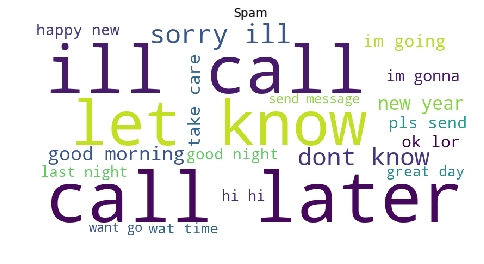

In [63]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


ham_data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_data)
plt.figure(figsize=(8, 4))
plt.title('Spam', fontsize=12)
plt.imshow(img)
plt.axis('off')

# BLOG

# NEWS

In [51]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt', '-PRON-']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [21]:
corpus = acquire.get_news_texts('business',
                                'sports',
                                'technology',
                                'entertainment')

In [22]:
prepare.prepare_article_data(corpus)
corpus

Removed 1 stopwords
---
Removed 1 stopwords
---
Removed 1 stopwords
---
Removed 3 stopwords
---
Removed 3 stopwords
---
Removed 1 stopwords
---
Removed 3 stopwords
---
Removed 2 stopwords
---
Removed 1 stopwords
---
Removed 2 stopwords
---
Removed 1 stopwords
---
Removed 2 stopwords
---
Removed 1 stopwords
---
Removed 4 stopwords
---
Removed 3 stopwords
---
Removed 2 stopwords
---
Removed 3 stopwords
---
Removed 1 stopwords
---
Removed 1 stopwords
---
Removed 2 stopwords
---
Removed 3 stopwords
---
Removed 2 stopwords
---
Removed 3 stopwords
---
Removed 1 stopwords
---
Removed 2 stopwords
---
Removed 3 stopwords
---
Removed 1 stopwords
---
Removed 4 stopwords
---
Removed 4 stopwords
---
Removed 5 stopwords
---
Removed 5 stopwords
---
Removed 3 stopwords
---
Removed 3 stopwords
---
Removed 2 stopwords
---
Removed 2 stopwords
---
Removed 5 stopwords
---
Removed 4 stopwords
---
Removed 2 stopwords
---
Removed 2 stopwords
---
Removed 1 stopwords
---
Removed 2 stopwords
---
Removed 3 stopwo

[{'link': 'https://inshorts.com/en/news/nirav-modi-denied-bail-for-third-time-despite-him-offering-₹18-cr-1557331847600',
  'category': 'business',
  'content': '\nNirav Modi denied bail for third time despite him offering ₹18 cr\n',
  'stemmed': 'nirav modi deni bail for third time despit him offer 18 cr',
  'lemmatized': 'nirav modi deni bail for third time despit -PRON- offer 18 cr',
  'clean': 'nirav modi deni bail third time despit -PRON- offer 18 cr'},
 {'link': 'https://inshorts.com/en/news/volkswagen-unit-porsche-fined-₹4100-crore-over-diesel-scandal-1557251200422',
  'category': 'business',
  'content': '\nVolkswagen unit Porsche fined ₹4,100 crore over diesel scandal\n',
  'stemmed': 'volkswagen unit porsch fine 4100 crore over diesel scandal',
  'lemmatized': 'volkswagen unit porsch fine 4100 crore over diesel scandal',
  'clean': 'volkswagen unit porsch fine 4100 crore diesel scandal'},
 {'link': 'https://inshorts.com/en/news/indian-technician-towing-kuwait-airways-plane-cr

In [23]:
corpus_df = pd.DataFrame(corpus)
corpus_df.head()

,category,clean,content,lemmatized,link,stemmed
0,business,nirav modi deni bail third time despit -PRON- ...,\nNirav Modi denied bail for third time despit...,nirav modi deni bail for third time despit -PR...,https://inshorts.com/en/news/nirav-modi-denied...,nirav modi deni bail for third time despit him...
1,business,volkswagen unit porsch fine 4100 crore diesel ...,"\nVolkswagen unit Porsche fined ₹4,100 crore o...",volkswagen unit porsch fine 4100 crore over di...,https://inshorts.com/en/news/volkswagen-unit-p...,volkswagen unit porsch fine 4100 crore over di...
2,business,indian technician tow kuwait airway plane crus...,\nIndian technician towing Kuwait Airways plan...,indian technician tow kuwait airway plane crus...,https://inshorts.com/en/news/indian-technician...,indian technician tow kuwait airway plane crus...
3,business,trump lose 1 bn decad avoid pay tax 8 yr nyt,"\nTrump lost $1 bn over a decade, avoided payi...",trump lose 1 bn over a decad avoid pay tax for...,https://inshorts.com/en/news/trump-lost-$1-bn-...,trump lost 1 bn over a decad avoid pay tax for...
4,business,father bid jet goyal ' daughter uk man ' claim,\nFather not bidding for Jet: Goyal's daughter...,father not bid for jet goyal ' daughter after ...,https://inshorts.com/en/news/father-not-biddin...,father not bid for jet goyal' daughter after u...


In [24]:
corpus_df= corpus_df[['category', 'clean']]
corpus_df

,category,clean
0,business,nirav modi deni bail third time despit -PRON- ...
1,business,volkswagen unit porsch fine 4100 crore diesel ...
2,business,indian technician tow kuwait airway plane crus...
3,business,trump lose 1 bn decad avoid pay tax 8 yr nyt
4,business,father bid jet goyal ' daughter uk man ' claim
5,business,lakshmi mittal hid link brother ' default firm...
6,business,hamdard pakistan offer help rooh afza shortag ...
7,business,tata steel say -PRON- china two day leave make...
8,business,resign pledg share provid 250 cr bank naresh g...
9,business,40 worth bitcoin steal 4th large crypto exchang


In [40]:
corpus_df.loc[corpus_df['category'] == 'business'].drop(columns=['category'])

,clean
0,nirav modi deni bail third time despit -PRON- ...
1,volkswagen unit porsch fine 4100 crore diesel ...
2,indian technician tow kuwait airway plane crus...
3,trump lose 1 bn decad avoid pay tax 8 yr nyt
4,father bid jet goyal ' daughter uk man ' claim
5,lakshmi mittal hid link brother ' default firm...
6,hamdard pakistan offer help rooh afza shortag ...
7,tata steel say -PRON- china two day leave make...
8,resign pledg share provid 250 cr bank naresh g...
9,40 worth bitcoin steal 4th large crypto exchang


In [46]:
business_words = clean(' '.join(corpus_df[corpus_df.category == 'business'].clean))
sports_words = clean(' '.join(corpus_df[corpus_df.category == 'sports'].clean))
technology_words = clean(' '.join(corpus_df[corpus_df.category == 'technology'].clean))
entertainment_words = clean(' '.join(corpus_df[corpus_df.category == 'entertainment'].clean))
all_words = clean(' '.join(corpus_df))

In [47]:
business_words

['nirav',
 'modi',
 'deni',
 'bail',
 'third',
 'time',
 'despit',
 'pron',
 'offer',
 '18',
 'cr',
 'volkswagen',
 'unit',
 'porsch',
 'fine',
 '4100',
 'crore',
 'diesel',
 'scandal',
 'indian',
 'technician',
 'tow',
 'kuwait',
 'airway',
 'plane',
 'crush',
 'death',
 'trump',
 'lose',
 '1',
 'bn',
 'decad',
 'avoid',
 'pay',
 'tax',
 '8',
 'yr',
 'nyt',
 'father',
 'bid',
 'jet',
 'goyal',
 'daughter',
 'uk',
 'man',
 'claim',
 'lakshmi',
 'mittal',
 'hid',
 'link',
 'brother',
 'default',
 'firm',
 'ruia',
 'hamdard',
 'pakistan',
 'offer',
 'help',
 'rooh',
 'afza',
 'shortag',
 'india',
 'tata',
 'steel',
 'say',
 'pron',
 'china',
 'two',
 'day',
 'leave',
 'make',
 'trade',
 'deal',
 'resign',
 'pledg',
 'share',
 'provid',
 '250',
 'cr',
 'bank',
 'naresh',
 'goyal',
 '40',
 'worth',
 'bitcoin',
 'steal',
 '4th',
 'large',
 'crypto',
 'exchang',
 'appl',
 'may',
 'open',
 'pron',
 '1st',
 'india',
 'retail',
 'store',
 'mumbai',
 'report',
 'uber',
 'rival',
 'lyft',
 'post'

In [48]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

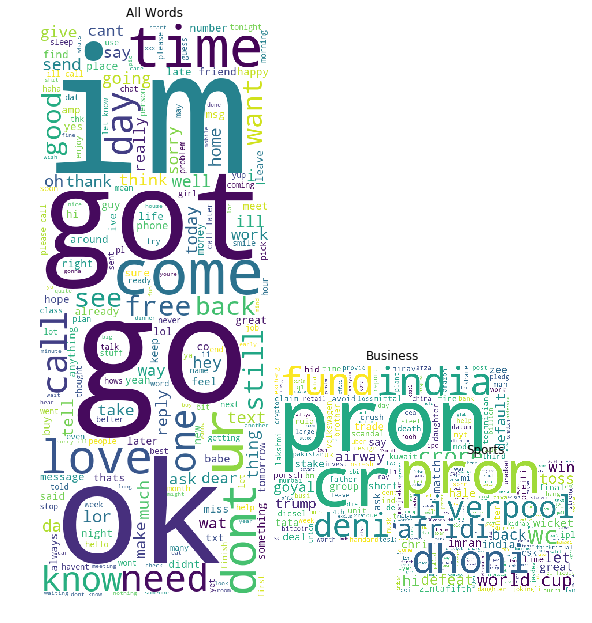

In [55]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
business_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(business_words))
sports_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(sports_words))
technology_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(technology_words))
entertainment_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(entertainment_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .33, 1]),
       plt.axes([.33, .0, .33, .5]),
       plt.axes([.5, 0, .25, .25])]
#        plt.axes([]),
#        plt.axes([])]

axs[0].imshow(all_cloud)
axs[1].imshow(business_cloud)
axs[2].imshow(sports_cloud)
# axs[3].imshow(technology_cloud)
# axs[4].imshow(entertainment_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Business')
axs[2].set_title('Sports')
# axs[3].set_title('Technology')
# axs[4].set_title('Entertainment')

for ax in axs: ax.axis('off')

In [69]:
def get_codeup_blog():
    links = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/',
             'https://codeup.com/data-science-myths/',
             'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/',
             'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/',
             'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/',
            ]
    
    corpus = []
    
    for link in links:
        corpus.append(acquire.get_codeup_article(link))

    return corpus

In [70]:
blog_df = pd.DataFrame(prepare.prepare_article_data(get_codeup_blog()))
blog_df.head()

Removed 101 stopwords
---
Removed 266 stopwords
---
Removed 177 stopwords
---
Removed 270 stopwords
---
Removed 139 stopwords
---


,clean,content,lemmatized,stemmed,title
0,rumor true time ha arriv codeup ha offici open...,\nThe rumors are true! The time has arrived. C...,the rumor be true the time ha arriv codeup ha ...,the rumor are true the time ha arriv codeup ha...,Codeup’s Data Science Career Accelerator is He...
1,dimitri antoni maggi giust datum scienc big da...,\nBy Dimitri Antoniou and Maggie Giust\nData S...,by dimitri antoni and maggi giust datum scienc...,by dimitri antoni and maggi giust data scienc ...,Data Science Myths - Codeup
2,dimitri antoni week ago codeup launch -PRON- i...,"\nBy Dimitri Antoniou\nA week ago, Codeup laun...",by dimitri antoni a week ago codeup launch -PR...,by dimitri antoni a week ago codeup launch our...,Data Science VS Data Analytics: What’s The Dif...
3,10 tip crush -PRON- sa tech job fair sa tech j...,\n10 Tips to Crush It at the SA Tech Job Fair\...,10 tip to crush -PRON- at the sa tech job fair...,10 tip to crush it at the sa tech job fair sa ...,10 Tips to Crush It at the SA Tech Job Fair - ...
4,competitor bootcamp close model danger program...,\nCompetitor Bootcamps Are Closing. Is the Mod...,competitor bootcamp be close be the model in d...,competitor bootcamp are close is the model in ...,Competitor Bootcamps Are Closing. Is the Model...


# News Articles